# Exercise 2

- Handling outliers and understanding frequency distribution, averages and variability
- Task: Dataset Analysis
- Objective: Perform exploratory data analysis to identify potential outliers in numerical 
features.
Investigate the impact of outlier handling techniques (e.g., capping, flooring, 
removal) on the distribution of these features.
Additionally, analyze the frequency distribution 
of categorical variables and variability to understand the class imbalance in the dataset. 

## About the dataset:
The wholesale customer data includes the following columns:

- Channel: Distribution channel type (e.g., Horeca or Retail).
- Region: Geographic area (e.g., Lisbon, Oporto, or Other).
- Fresh: Annual spending on fresh products.
- Milk: Annual spending on milk products.
- Grocery: Annual spending on grocery items.
- Frozen: Annual spending on frozen products.
- Detergents_Paper: Annual spending on detergents and paper.
- Delicassen: Annual spending on delicatessen items.

**Description**: The dataset represents annual spending across different categories for wholesale customers segmented by region and channel.

Requirements: 

- Use NumPy for numerical operations and array manipulation. 
- Use Pandas for data manipulation and analysis. 
- Use Matplotlib for data visualization. 

Questions: 
1. Identify and handle outliers in at least three numerical columns of your choice. 
2. Determine the frequency distribution for at least two categorical columns. 
3. Calculate and interpret the mean, median, and mode for at least three numerical 
columns. 
4. Measure and analyze the variability of at least three numerical columns using 
standard deviation and interquartile range. 
5. Insights and Conclusions: 

- Visualize the distribution of numerical data using histograms and box plots. 
- Explore relationships between variables using scatter plots or correlation 
matrices. 
- Consider creating summary tables for categorical data to understand class 
distributions.

## 1. Identify and Handle Outliers

- We see the initial distribution of data, and final after outlier handling
- Using boxplot and IQR, we find outliers and remove them

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df_groceries = pd.read_csv('./Wholesale customers data.csv')

print("Old Shape: ", df_groceries.shape)
df_groceries.head()

Old Shape:  (440, 8)


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [48]:
df_groceries.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


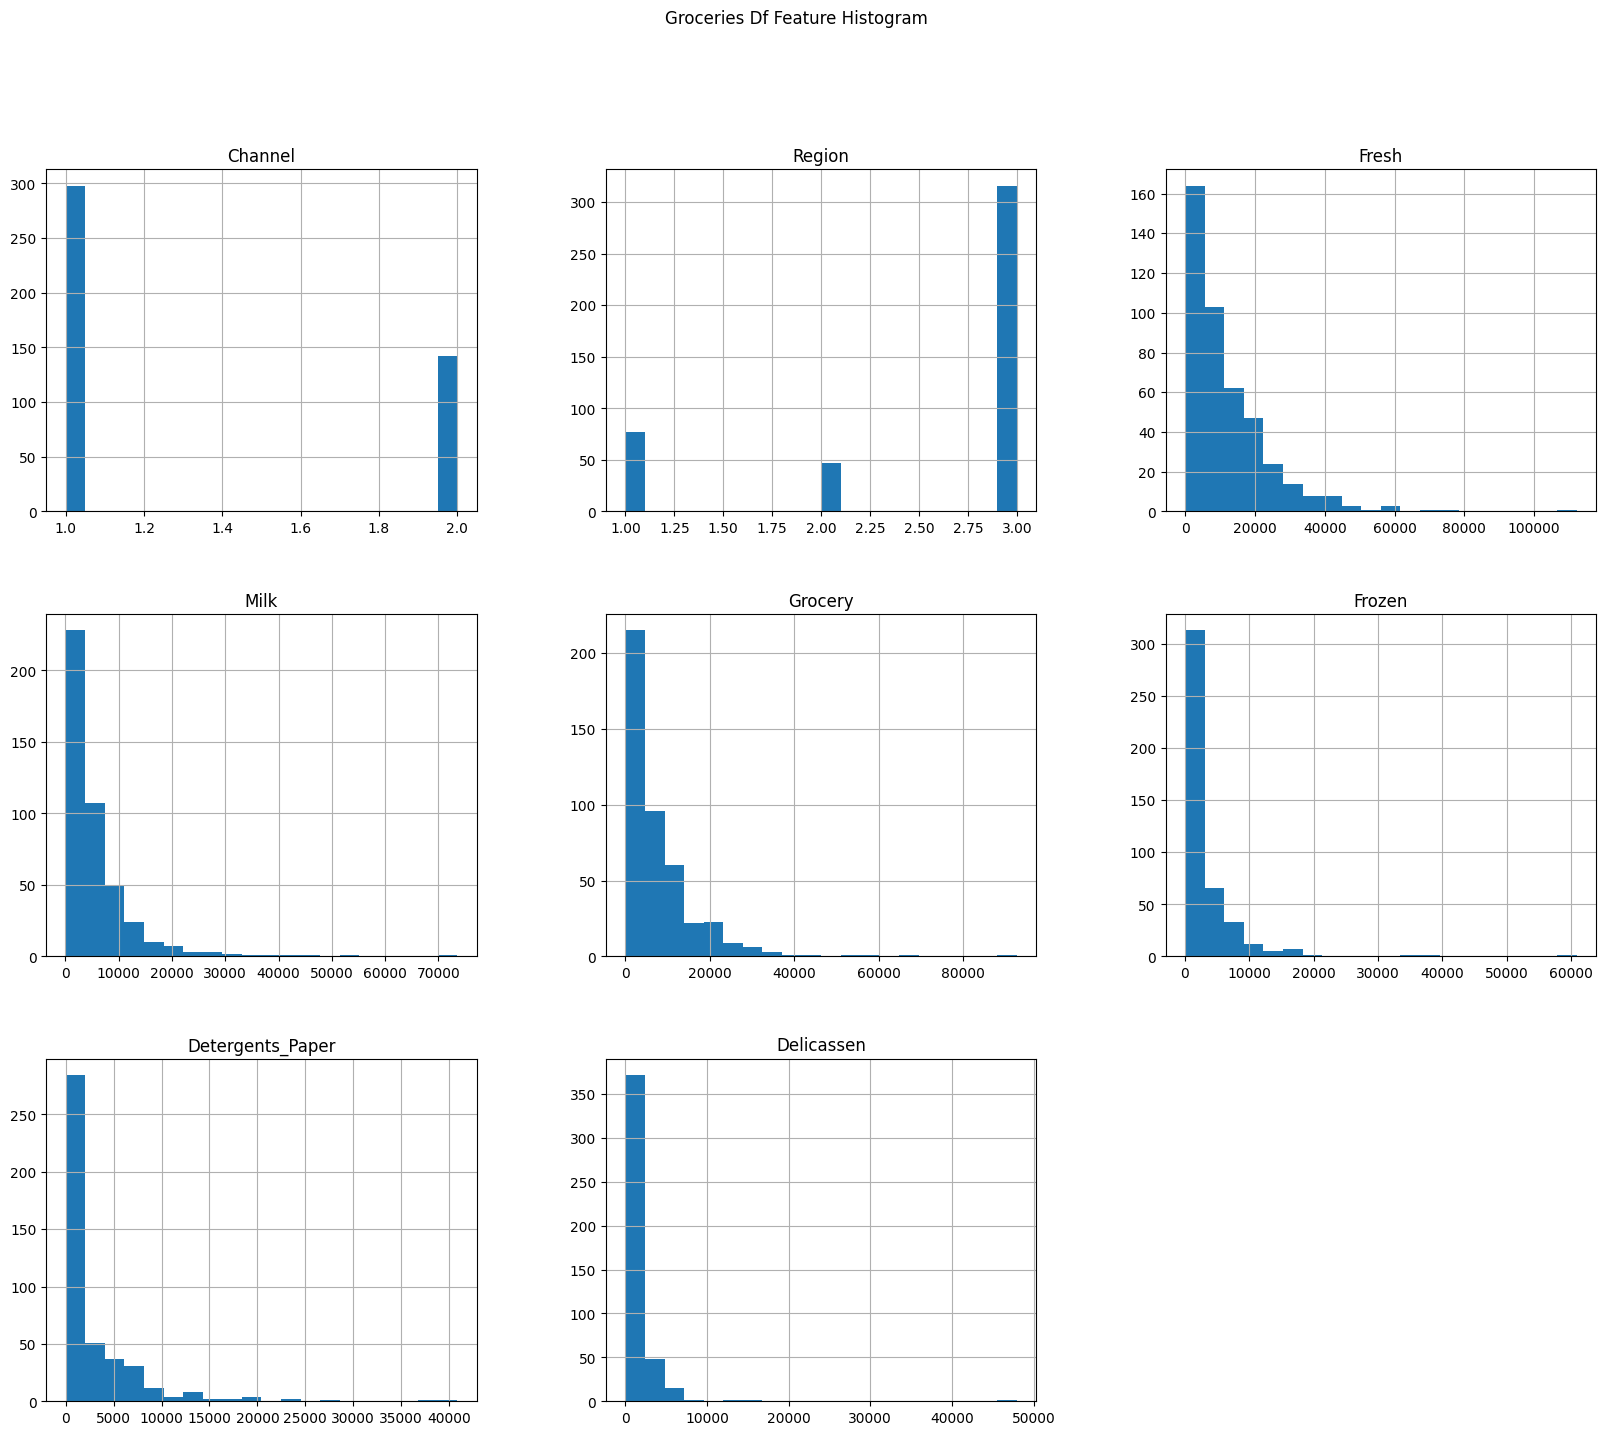

In [49]:
df_groceries.hist(bins=20, figsize=(20,16))
plt.suptitle("Groceries Df Feature Histogram")
plt.show()

In [50]:
numerical_columns = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Delicassen' ]

correlation_matrix = df_groceries[numerical_columns].corr()
correlation_matrix


,Fresh,Milk,Grocery,Frozen,Delicassen
Fresh,1.000000,0.100510,-0.011854,0.345881,0.244690
Milk,0.100510,1.000000,0.728335,0.123994,0.406368
Grocery,-0.011854,0.728335,1.000000,-0.040193,0.205497
Frozen,0.345881,0.123994,-0.040193,1.000000,0.390947
Delicassen,0.244690,0.406368,0.205497,0.390947,1.000000


## Handling Outliers and observing Distributions

We will use techniques like capping, flooring and others to observe. 


## I. Removal

##### We had to change the multiplier accordingly to remove the outliers for each column. The normal one is 1.5, we have used 1 and 0.5 accordingly


Lower and Upper Bounds: -1003.75 3232.25
Lower and Upper Bounds: -663.75 4960.25
Lower and Upper Bounds: -10678.25 30739.75


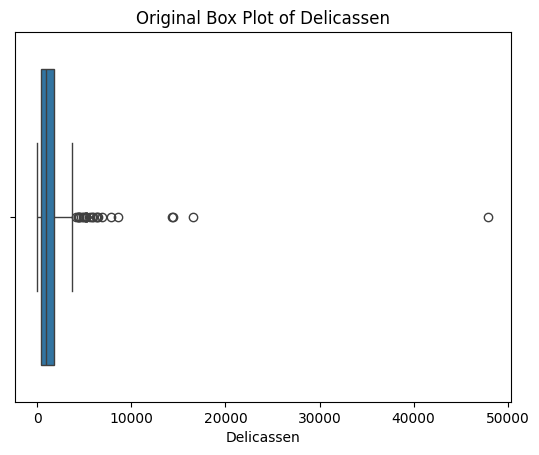

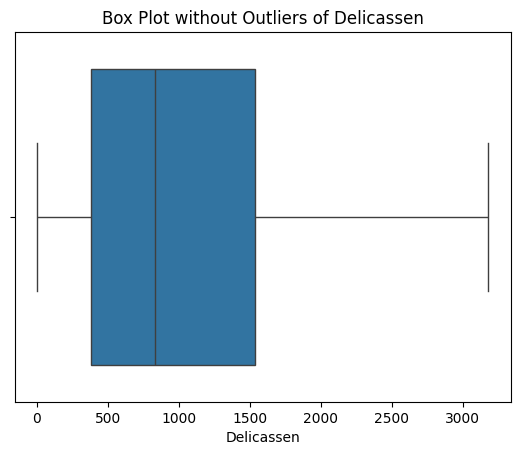

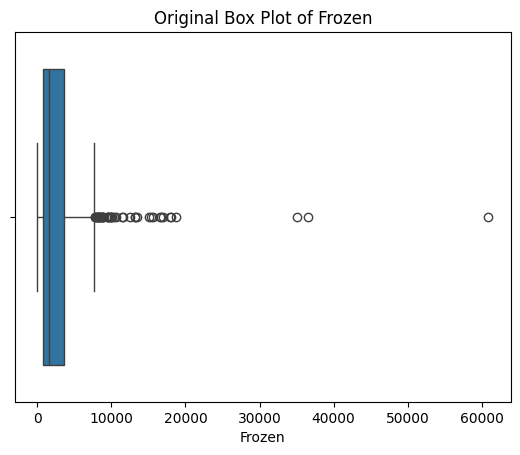

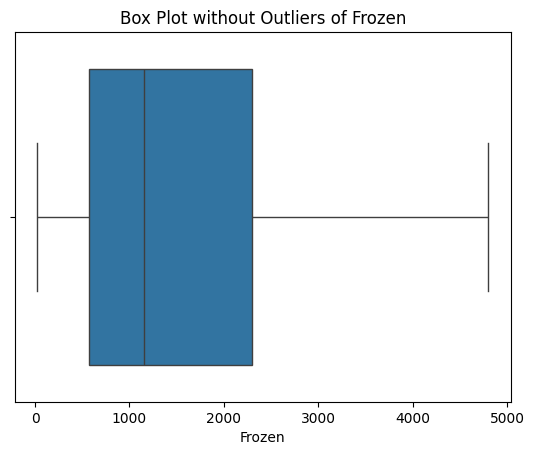

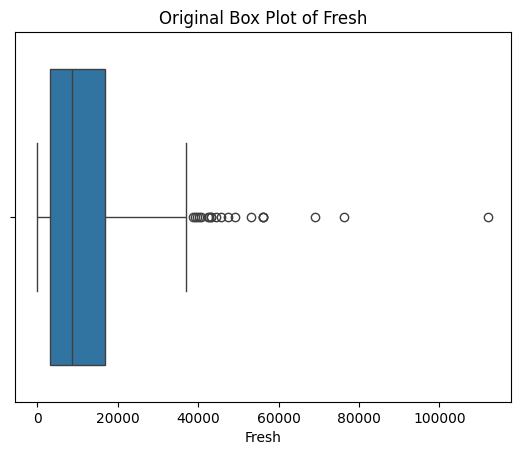

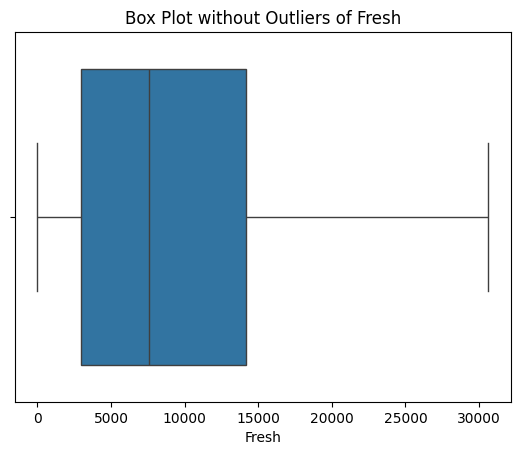

In [51]:
def removal_box_plot(df, column, threshold1, threshold2):
    sns.boxplot(x=df[column], vert=False)
    plt.title(f'Original Box Plot of {column}')
    plt.show()

    removed_outliers = df.loc[(df[column] > threshold1) & (df[column] < threshold2)]
    
    sns.boxplot(x=removed_outliers[column], vert=False)
    plt.title(f'Box Plot without Outliers of {column}')
    plt.show()
    return removed_outliers

def find_threshold(df, column ,multiplier = 1.5):
    df_arr = df[column].values
    Q1 = np.percentile(df_arr, 25)
    Q3 = np.percentile(df_arr, 75)

    IQR = Q3 - Q1
    IF1 = Q1 - multiplier * IQR  # Lower bound
    IF2 = Q3 + multiplier * IQR  # Upper bound
    print ('Lower and Upper Bounds:', IF1, IF2)
    return IF1, IF2

th1_delicassen, th2_delicassen = find_threshold(df_groceries, 'Delicassen', 1)
th1_frozen, th2_frozen = find_threshold(df_groceries, 'Frozen', 0.5)
th1_fresh, th2_fresh = find_threshold(df_groceries, 'Fresh', 1)

no_outliers = removal_box_plot(df_groceries, 'Delicassen', th1_delicassen, th2_delicassen)
no_outliers = removal_box_plot(df_groceries, 'Frozen', th1_frozen, th2_frozen)
no_outliers = removal_box_plot(df_groceries, 'Fresh', th1_fresh, th2_fresh)


## II. Capping (Winsorization)

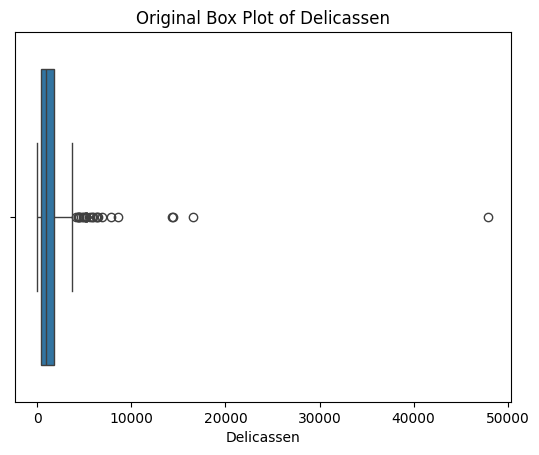

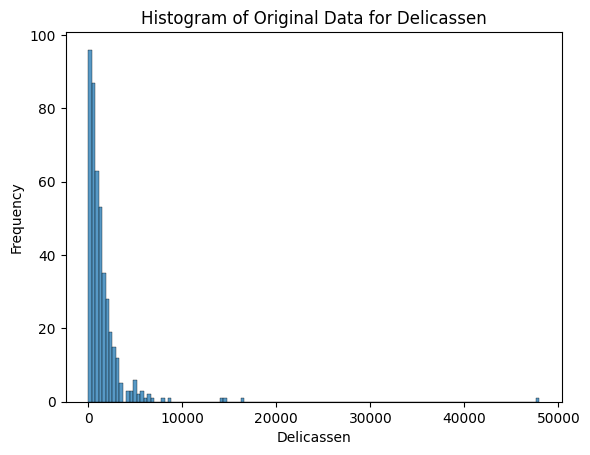

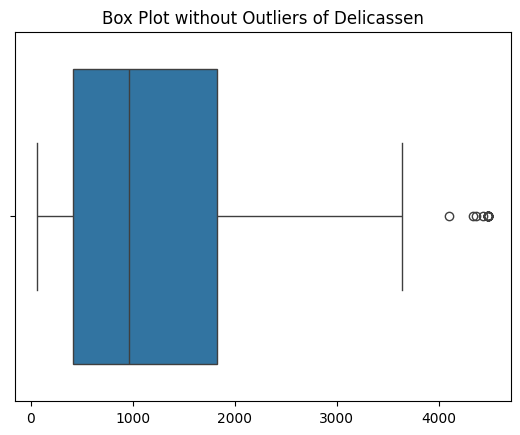

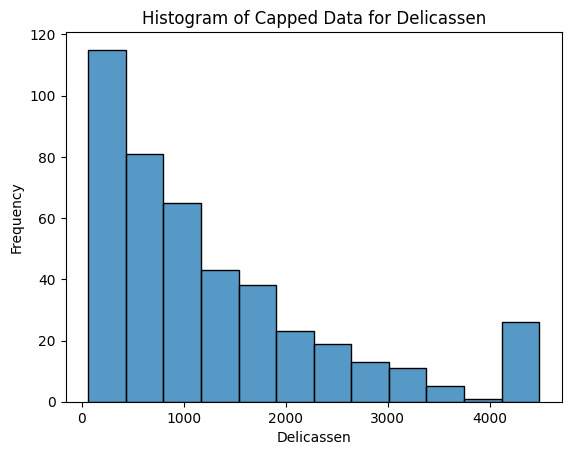

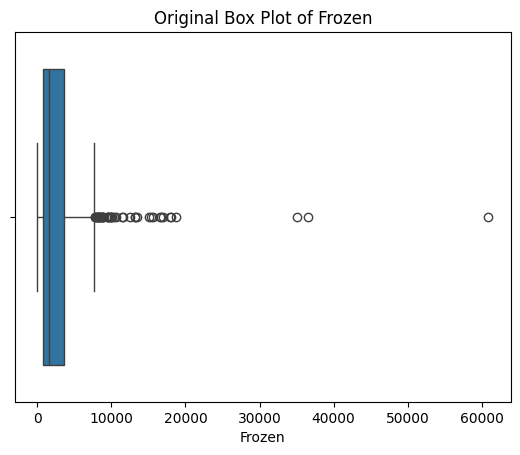

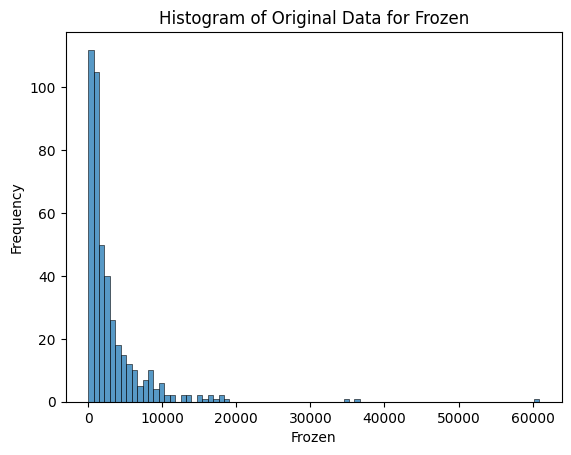

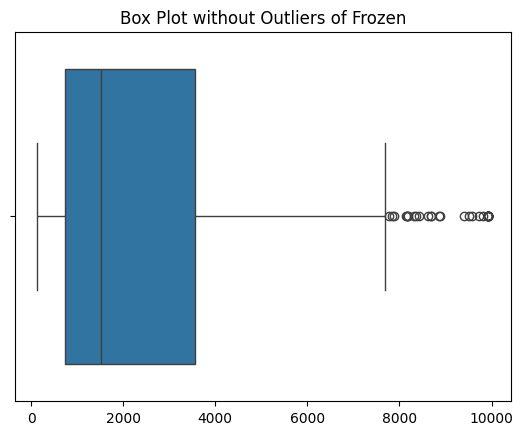

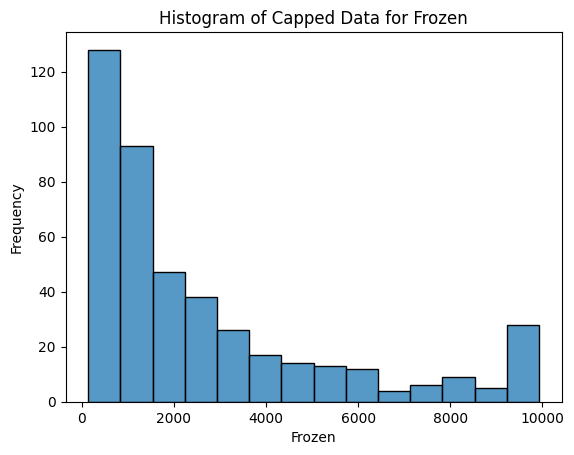

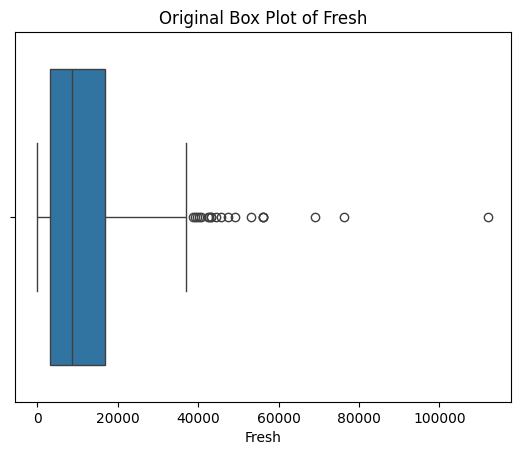

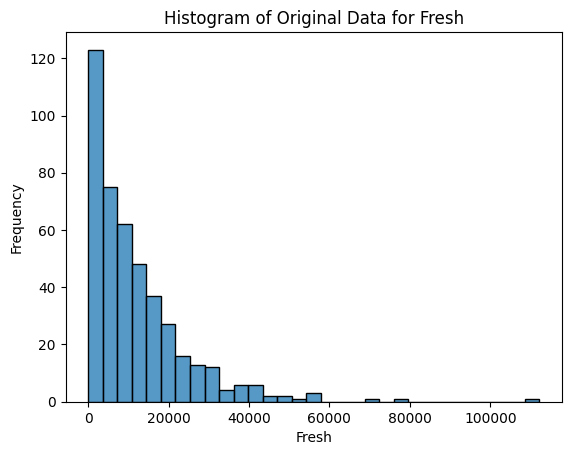

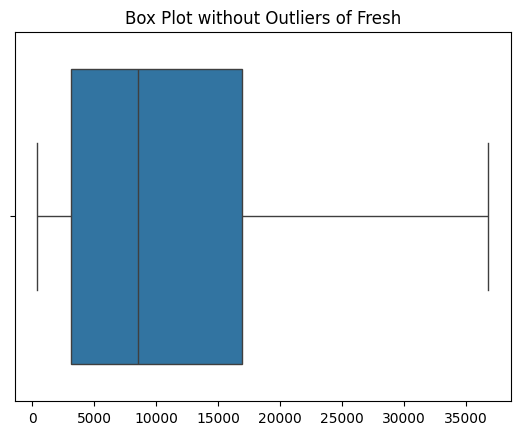

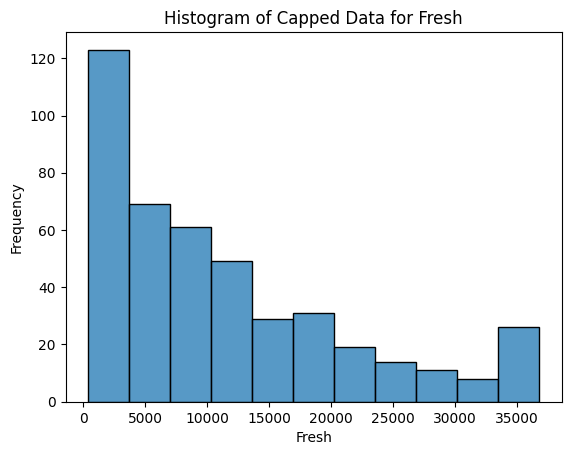

In [52]:
def cap_outliers(df, column, lower_percentile=5, upper_percentile=95):
    sns.boxplot(x=df[column], vert=False)
    plt.title(f'Original Box Plot of {column}')
    plt.show()
    
    sns.histplot(df[column], kde=False)
    plt.title(f'Histogram of Original Data for {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()
    
    data = df[column].values
    lower_bound = np.percentile(data, lower_percentile)
    upper_bound = np.percentile(data, upper_percentile)
    capped_data = np.clip(data, lower_bound, upper_bound)

    sns.boxplot(x=capped_data, vert=False)
    plt.title(f'Box Plot without Outliers of {column}')
    plt.show()

    sns.histplot(capped_data, kde=False)
    plt.title(f'Histogram of Capped Data for {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()
    
    return capped_data
    
no_outliers = cap_outliers(df_groceries, 'Delicassen')
no_outliers = cap_outliers(df_groceries, 'Frozen')
no_outliers = cap_outliers(df_groceries, 'Fresh')

## III. Flooring (Truncation)
Flooring is similar to capping but only involves setting a lower bound

Here not one datapoint is below the Q1 (from before analysis). So need not do this again.

In [53]:
def floor_outliers(df, column, lower_bound):
    # sns.boxplot(x=df[column], vert=False)
    # plt.title(f'Original Box Plot of {column}')
    # plt.show()
    
    # sns.histplot(df[column], kde=False)
    # plt.title(f'Histogram of Original Data for {column}')
    # plt.xlabel(column)
    # plt.ylabel('Frequency')
    # plt.show()

    data = df[column].values
    floored_data = np.maximum(data, lower_bound)

    # sns.boxplot(x=capped_data, vert=False)
    # plt.title(f'Box Plot without Outliers of {column}')
    # plt.show()

    # sns.histplot(capped_data, kde=False)
    # plt.title(f'Histogram of Floored Data for {column}')
    # plt.xlabel(column)
    # plt.ylabel('Frequency')
    # plt.show()
    
    return floored_data
    
no_outliers = floor_outliers(df_groceries, 'Delicassen', 0)
no_outliers = floor_outliers(df_groceries, 'Frozen',0)
no_outliers = floor_outliers(df_groceries, 'Fresh',0)

### To handle outliers

- we can use **transformation** or **imputation**
- we shall just drop it for now
- By using the threshold values previously collected, we'll perform drop operation

In [54]:
col_dict = {
    'Delicassen' : 1.25,
    'Frozen' : 0.75,
    'Fresh' : 1.25
}
def handle_outliers(df, column, lower_bound, upper_bound):
    df[column] = np.clip(df[column], lower_bound, upper_bound)
    return df

for col, mult in col_dict.items():
    lower_bound, upper_bound = find_threshold(df_groceries, col, mult)
    df_groceries = handle_outliers(df_groceries, col, lower_bound, upper_bound)

df_groceries.sample(10)

Lower and Upper Bounds: -1356.75 3585.25
Lower and Upper Bounds: -1366.75 5663.25
Lower and Upper Bounds: -14129.75 34191.25


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
400,1,3,4446.0,906,1238,3576.00,153,1014.00
412,1,3,97.0,3605,12400,98.00,2970,62.00
62,2,3,7823.0,6245,6544,4154.00,4074,964.00
240,1,1,22096.0,3575,7041,5663.25,343,2564.00
226,2,1,20782.0,5921,9212,1759.00,2568,1553.00
95,1,3,3.0,2920,6252,440.00,223,709.00
82,2,3,10362.0,9232,11009,737.00,3537,2342.00
28,2,3,4113.0,20484,25957,1158.00,8604,3585.25
261,1,1,7858.0,1110,1094,5663.25,49,287.00
73,2,3,19899.0,5332,8713,5663.25,764,648.00


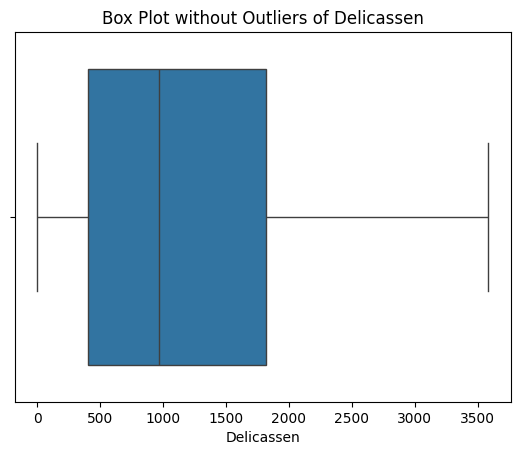

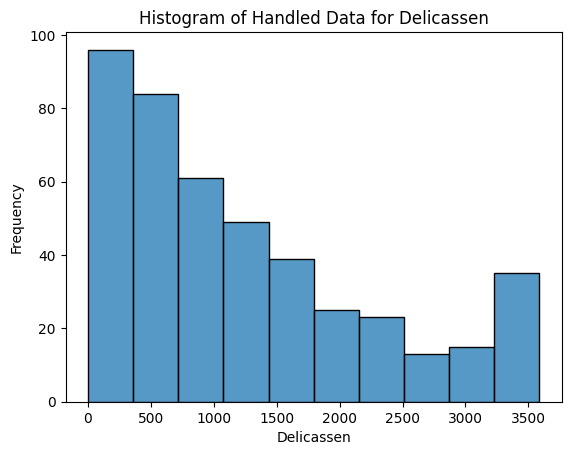

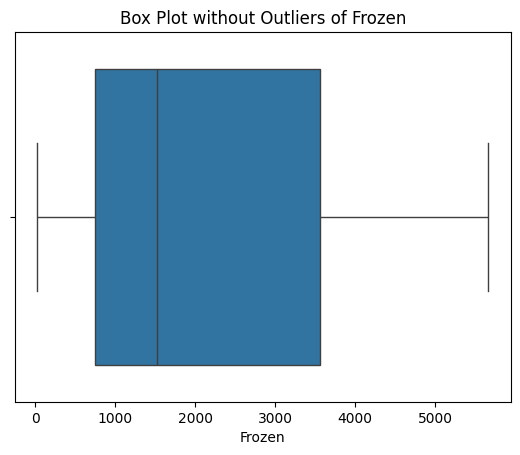

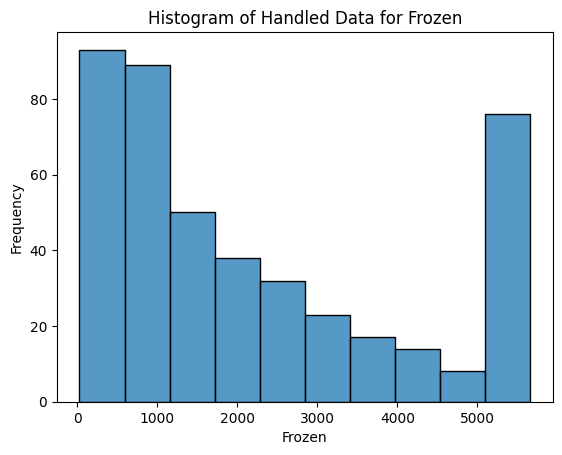

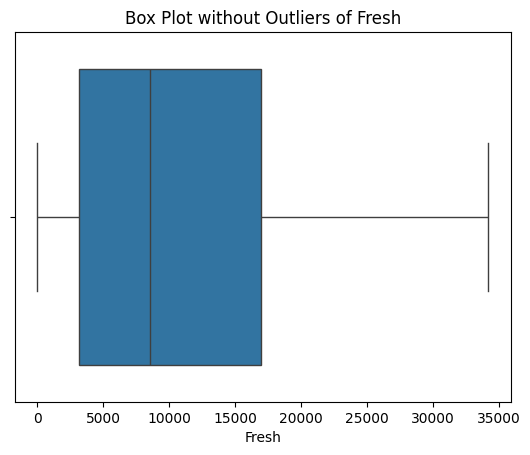

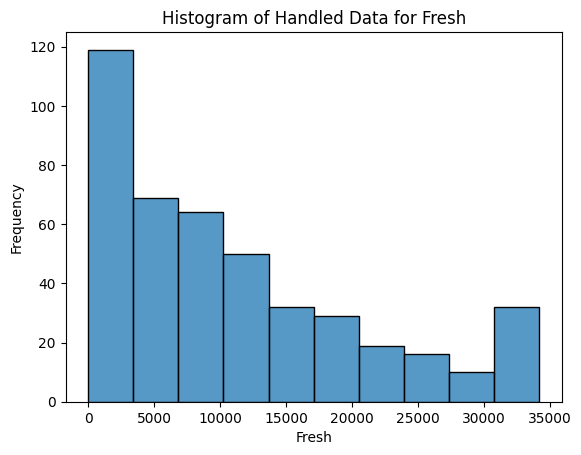

In [55]:
for col in col_dict.keys():
    sns.boxplot(x=df_groceries[col], vert=False)
    plt.title(f'Box Plot without Outliers of {col}')
    plt.show()

    sns.histplot(df_groceries[col], kde=False)
    plt.title(f'Histogram of Handled Data for {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

# 2. Frequency Distribution

#### For the columns **'Region'** and **'Channel'**

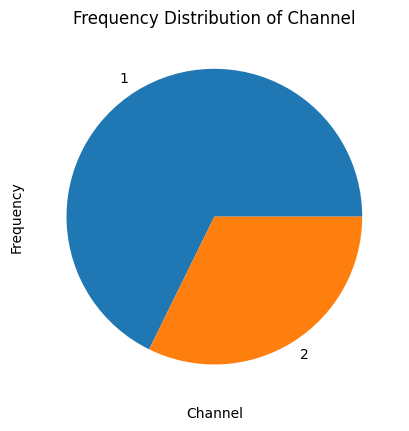

In [56]:
Channel_distribution = df_groceries['Channel'].value_counts()

Channel_distribution.plot(kind='pie', color='skyblue')
plt.title('Frequency Distribution of Channel')
plt.xlabel('Channel')
plt.ylabel('Frequency')
plt.show()


#### For the column **'Region'**

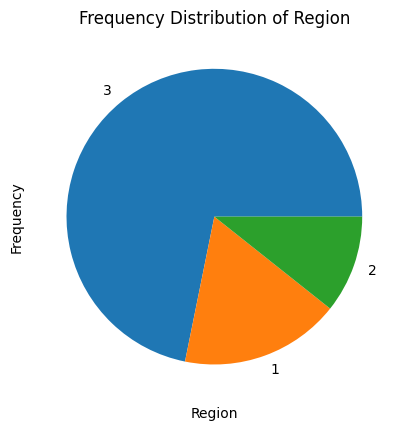

In [57]:
Region_distribution = df_groceries['Region'].value_counts()

Region_distribution.plot(kind='pie', color='skyblue')
plt.title('Frequency Distribution of Region')
plt.xlabel('Region')
plt.ylabel('Frequency')
plt.show()

In [58]:
print("Region Distribution:\n") 
Region_distribution

Region Distribution:



Region
3    316
1     77
2     47
Name: count, dtype: int64

In [59]:
print("Channel Distribution:\n")
Channel_distribution

Channel Distribution:



Channel
1    298
2    142
Name: count, dtype: int64

# 3.Interpret the mean, median, and mode

In [60]:
columns_to_analyze = ['Fresh', 'Milk', 'Grocery']

for column in columns_to_analyze:
    mean_value = df_groceries[column].mean()
    median_value = df_groceries[column].median()
    mode_value = df_groceries[column].mode()[0]
    print(f"{column} - Mean: {mean_value}, Median: {median_value}, Mode: {mode_value}")


Fresh - Mean: 11173.4125, Median: 8504.0, Mode: 34191.25
Milk - Mean: 5796.265909090909, Median: 3627.0, Mode: 577
Grocery - Mean: 7951.277272727273, Median: 4755.5, Mode: 683


# 4.Variability using standard deviation and interquartile range.

In [61]:
for column in columns_to_analyze:
    std_dev = df_groceries[column].std()
    q1 = df_groceries[column].quantile(0.25)
    q3 = df_groceries[column].quantile(0.75)
    iqr = q3 - q1

    print(f"{column} - Standard Deviation: {std_dev}, IQR: {iqr}")

Fresh - Standard Deviation: 9757.284523163173, IQR: 13806.0
Milk - Standard Deviation: 7380.377174570841, IQR: 5657.25
Grocery - Standard Deviation: 9503.162828994344, IQR: 8502.75


# Visualizations:

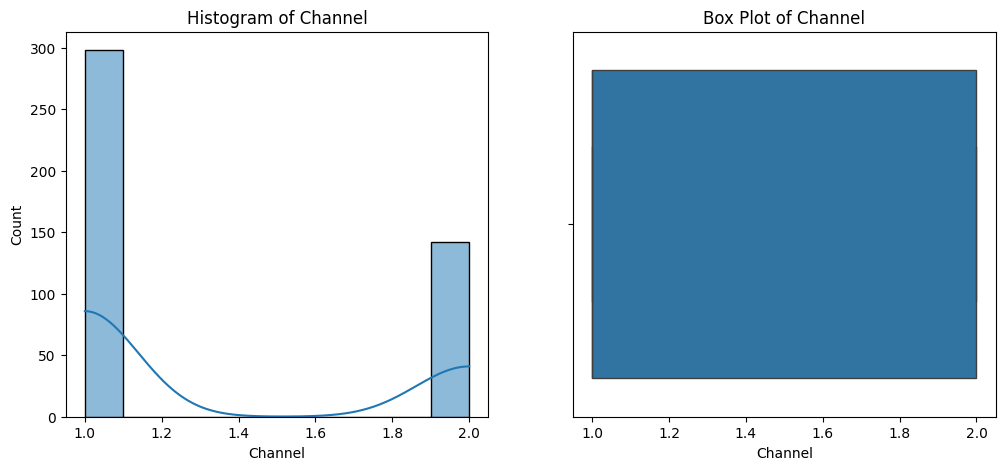

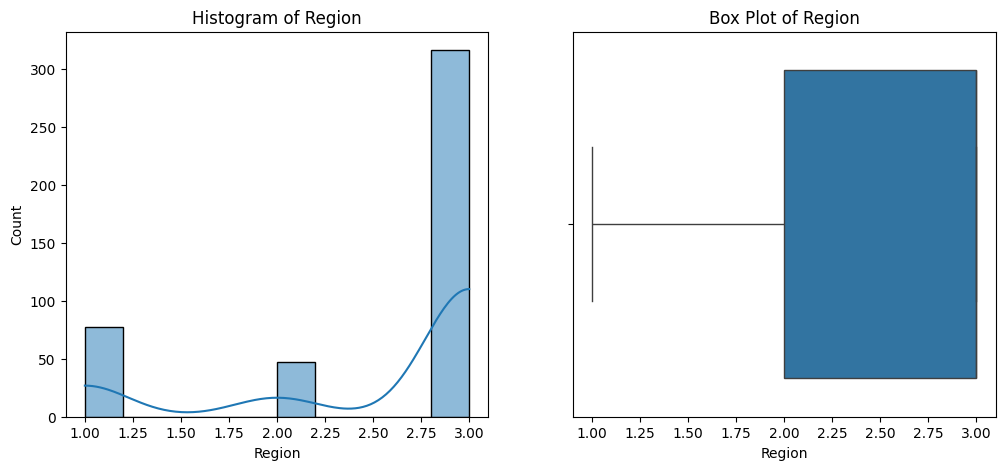

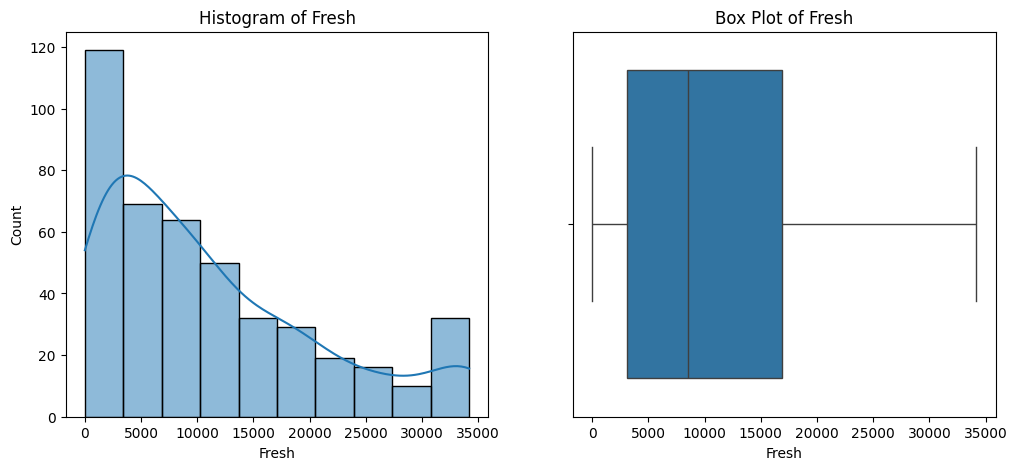

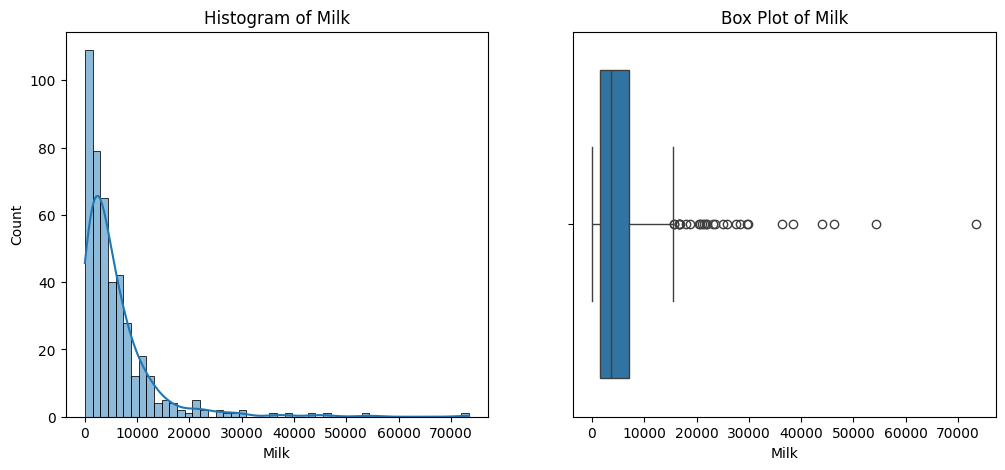

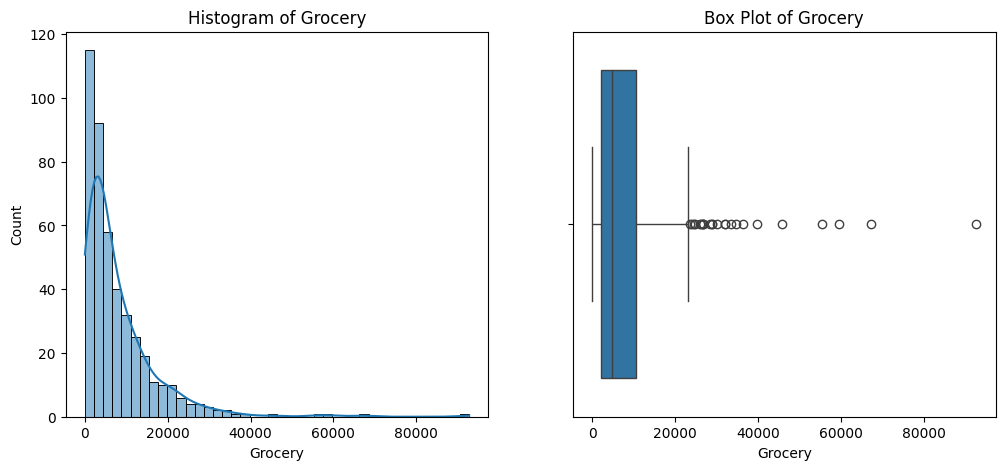

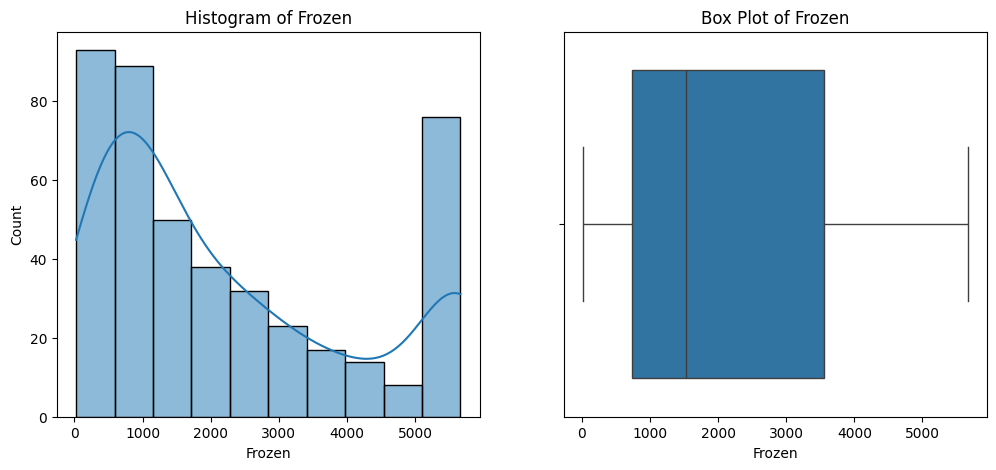

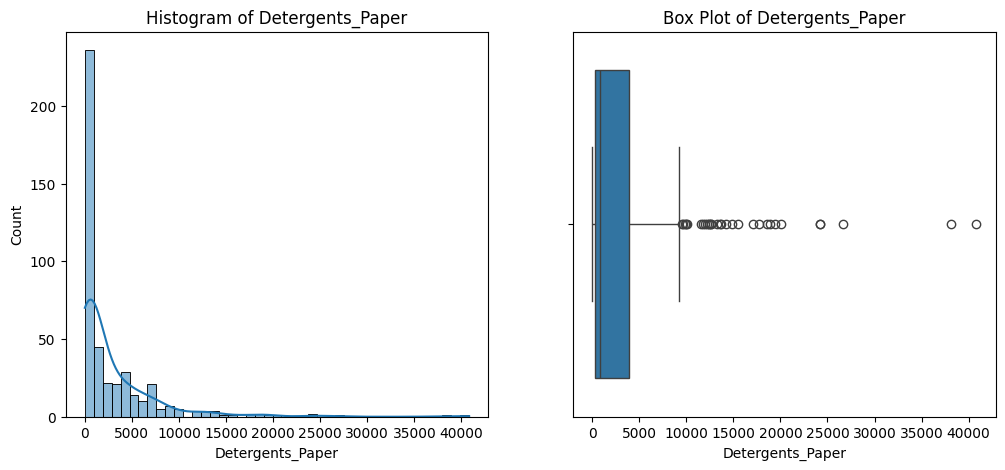

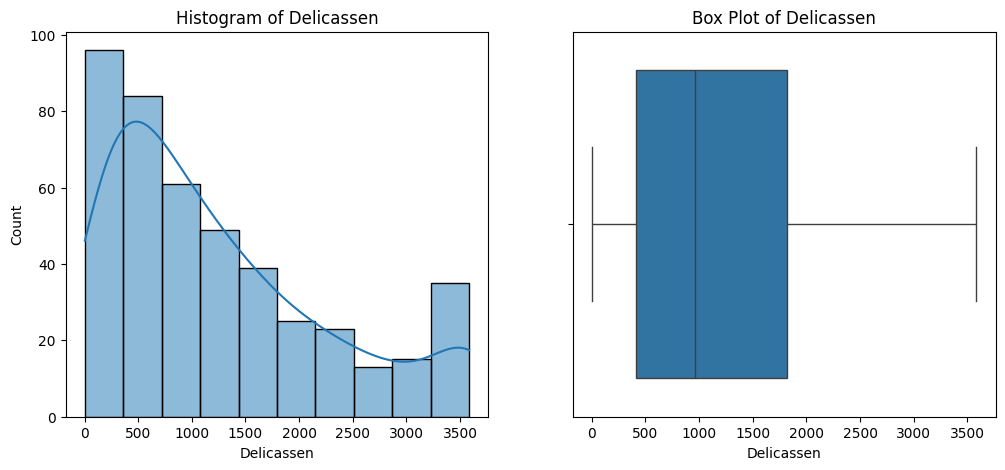

In [62]:
def plot_distributions(df, columns):
    for col in columns:
        plt.figure(figsize=(12, 5))
        plt.subplot(1, 2, 1)
        sns.histplot(df[col], kde=True)
        plt.title(f'Histogram of {col}')
        
        plt.subplot(1, 2, 2)
        sns.boxplot(x=df[col])
        plt.title(f'Box Plot of {col}')
        
        plt.show()

plot_distributions(df_groceries, df_groceries.columns)

In [63]:
df_groceries.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,11173.412500,5796.265909,7951.277273,2255.248295,2881.493182,1244.723864
std,0.468052,0.774272,9757.284523,7380.377175,9503.162829,1910.124541,4767.854448,1030.857479
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,34191.250000,73498.000000,92780.000000,5663.250000,40827.000000,3585.250000


In [64]:
df_groceries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Channel           440 non-null    int64  
 1   Region            440 non-null    int64  
 2   Fresh             440 non-null    float64
 3   Milk              440 non-null    int64  
 4   Grocery           440 non-null    int64  
 5   Frozen            440 non-null    float64
 6   Detergents_Paper  440 non-null    int64  
 7   Delicassen        440 non-null    float64
dtypes: float64(3), int64(5)
memory usage: 27.6 KB


In [77]:
numerical_columns = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Delicassen' ]
categorical_columns = ['Channel', 'Region']

<Figure size 1200x600 with 0 Axes>

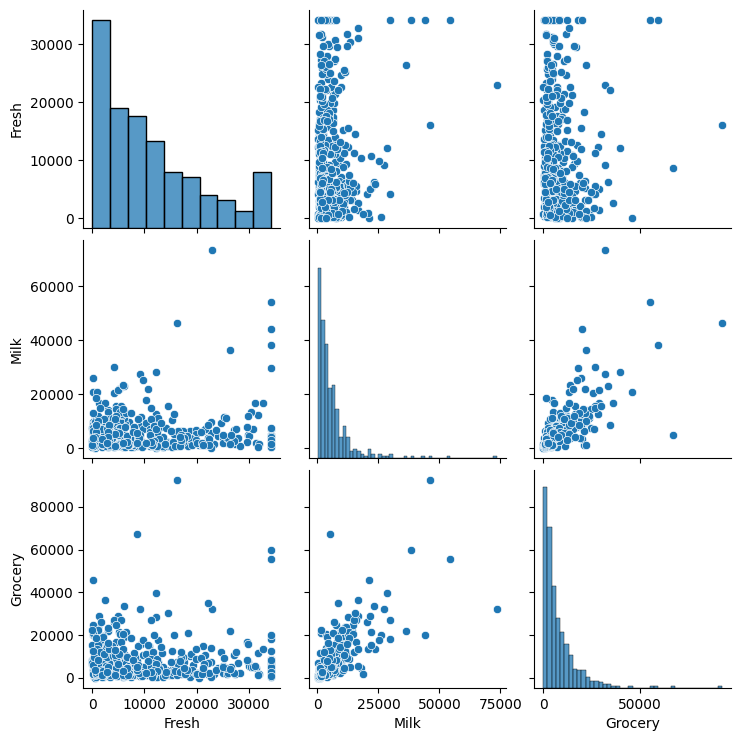

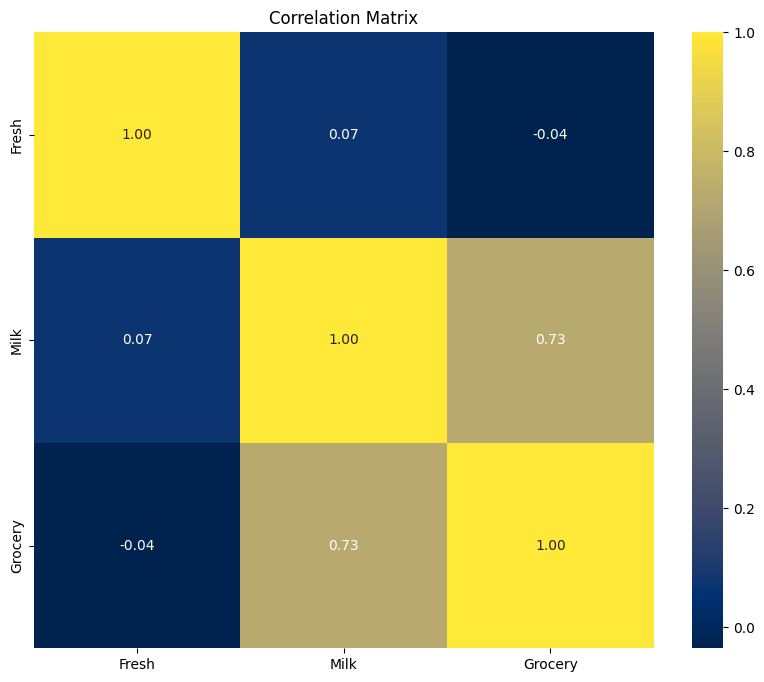

In [85]:
def plot_relationships(df, numerical_columns):
    plt.figure(figsize=(12, 6))
    sns.pairplot(df[numerical_columns])
    plt.show()
    
    correlation_matrix = df[numerical_columns].corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='cividis', fmt='.2f')
    plt.title('Correlation Matrix')
    plt.show()

plot_relationships(df_groceries, ['Fresh', 'Milk', 'Grocery'])


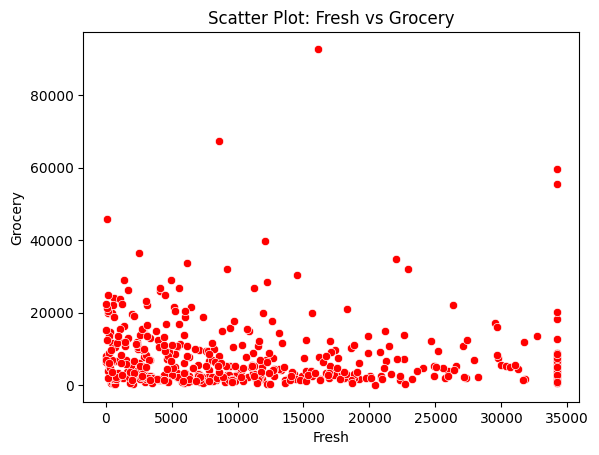

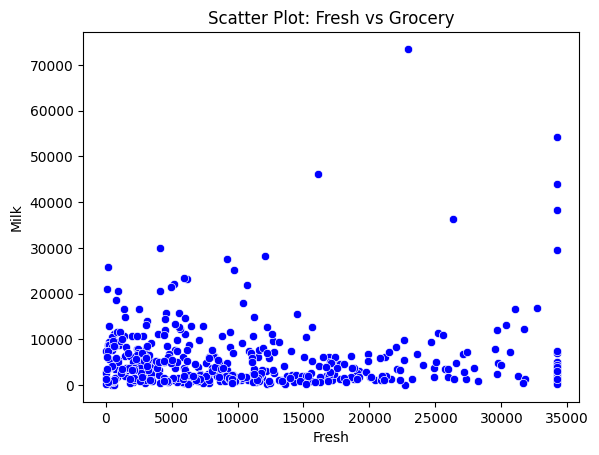

In [88]:
sns.scatterplot(x='Fresh', y='Grocery', data=df_groceries, color='red')
plt.title('Scatter Plot: Fresh vs Grocery')
plt.xlabel('Fresh')
plt.ylabel('Grocery')
plt.show()

sns.scatterplot(x='Fresh', y='Milk', data=df_groceries, color='blue')
plt.title('Scatter Plot: Fresh vs Grocery')
plt.xlabel('Fresh')
plt.ylabel('Milk')
plt.show()

In [89]:
def summary_tables(df, categorical_columns):
    for col in categorical_columns:
        summary = df[col].value_counts()
        print(f"\nSummary of {col}:\n", summary)

summary_tables(df_groceries, ['Channel', 'Region'])


Summary of Channel:
 Channel
1    298
2    142
Name: count, dtype: int64

Summary of Region:
 Region
3    316
1     77
2     47
Name: count, dtype: int64


In [90]:
correlation_matrix = df_groceries[numerical_columns].corr()
correlation_matrix

,Fresh,Milk,Grocery,Frozen,Delicassen
Fresh,1.000000,0.070879,-0.035718,0.351304,0.261154
Milk,0.070879,1.000000,0.728335,0.024941,0.352835
Grocery,-0.035718,0.728335,1.000000,-0.113302,0.269365
Frozen,0.351304,0.024941,-0.113302,1.000000,0.235142
Delicassen,0.261154,0.352835,0.269365,0.235142,1.000000


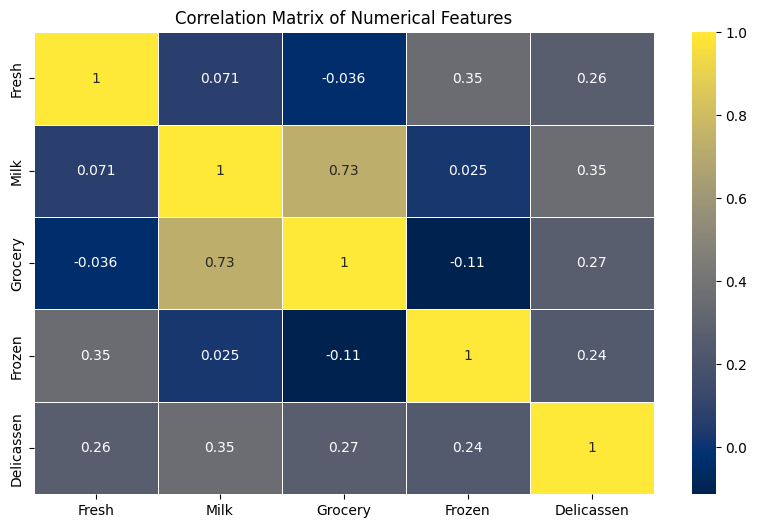

In [91]:
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='cividis', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# 5. Summary and Insights

## Summary of results

### **I. Summary of Outlier Handling**

**Original Thresholds:**

-   **Delicassen:** −1709.75,3938.25-1709.75, 3938.25−1709.75,3938.25
-   **Frozen:** −3475.75,7772.25-3475.75, 7772.25−3475.75,7772.25
-   **Fresh:** −17581.25,37642.75-17581.25, 37642.75−17581.25,37642.75

**New Thresholds:**

-   **Delicassen:** −1177.50,2621.75-1177.50, 2621.75−1177.50,2621.75
-   **Frozen:** −3317.50,5109.50-3317.50, 5109.50−3317.50,5109.50
-   **Fresh:** −14076.25,31944.75-14076.25, 31944.75−14076.25,31944.75

### **II. Frequency Distribution for Categorical Columns**

#### **Categorical Columns:**

-   **Channel:** 1, 2
-   **Region:** 1, 2, 3

#### **Frequency Distribution:**

In [83]:
df_groceries['Channel'].value_counts()

Channel
1    298
2    142
Name: count, dtype: int64

In [84]:
df_groceries['Region'].value_counts()

Region
3    316
1     77
2     47
Name: count, dtype: int64

### **III. Summary Statistics for Numerical Columns**

#### **Statistics:**

-   **Mean, Median, Mode:**
    -   **Fresh:** Mean = 10956.49, Median = 8504, Mode = 3127.75
    -   **Milk:** Mean = 5796.27, Median = 3627, Mode = 55
    -   **Grocery:** Mean = 7951.28, Median = 4755.50, Mode = 3

#### **Variability Measures:**

-   **Standard Deviation and IQR:**
    -   **Fresh:**
        -   **Standard Deviation:** 9269.71
        -   **IQR:** 13759.75
    -   **Milk:**
        -   **Standard Deviation:** 7380.38
        -   **IQR:** 5657.25
    -   **Grocery:**
        -   **Standard Deviation:** 9503.16
        -   **IQR:** 5447.75

## Insights and Conclusion


1.   **Outlier Handling:**
- The thresholds for outliers have been adjusted to a more appropriate range, leading to more realistic data distribution.
- Capping and flooring help mitigate the effect of extreme values but do not eliminate outliers completely.

2. **Correlation Changes:**
    
-   The correlation between variables has slightly changed after outlier removal, indicating that extreme values influenced the original correlation matrix.
-  **Milk** and **Grocery** maintain a high correlation, while **Frozen** and **Delicassen** show minor changes in correlation, suggesting less impact from outliers on these variables.

